In [1]:
#Classification

In [2]:
%%time
from sklearn.datasets import fetch_mldata

Wall time: 1.33 s


In [3]:
%%time
mnist = fetch_mldata('MNIST original')
mnist

Wall time: 146 ms


In [4]:
%%time
X, y = mnist['data'], mnist['target']

Wall time: 0 ns


In [5]:
%%time
X.shape

Wall time: 0 ns


(70000, 784)

In [6]:
%%time
y.shape

Wall time: 0 ns


(70000,)

In [7]:
%%time
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

Wall time: 734 ms


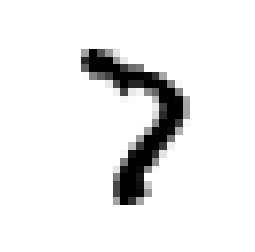

Wall time: 107 ms


In [8]:
%%time
some_digit = X[42000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [9]:
%%time
y[42000]

Wall time: 0 ns


7.0

In [10]:
%%time
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Wall time: 0 ns


In [11]:
%%time
import numpy as np

Wall time: 0 ns


In [12]:
%%time
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

Wall time: 23 ms


In [13]:
%%time
#trining a binary classifier
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

Wall time: 0 ns


In [14]:
%%time
from sklearn.linear_model import SGDClassifier

Wall time: 306 ms


In [15]:
%%time
sgd_clf = SGDClassifier(random_state=42, max_iter=5, tol=None, n_jobs=-1, verbose=1)
sgd_clf.fit(X_train, y_train_5)

-- Epoch 1
Norm: 7917.97, NNZs: 618, Bias: 7.903960, T: 60000, Avg. loss: 99475.380189
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 4822.19, NNZs: 640, Bias: 16.083369, T: 120000, Avg. loss: 13450.975482
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 3616.59, NNZs: 649, Bias: 20.128374, T: 180000, Avg. loss: 7835.728175
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 2930.35, NNZs: 653, Bias: 23.415529, T: 240000, Avg. loss: 5439.711790
Total training time: 0.22 seconds.
-- Epoch 5
Norm: 2539.39, NNZs: 654, Bias: 25.859478, T: 300000, Avg. loss: 4224.514269
Total training time: 0.28 seconds.
Wall time: 549 ms


In [16]:
%%time
some_digit = X[34000]
sgd_clf.predict([some_digit])

Wall time: 0 ns


In [17]:
%%time
sgd_clf.predict([X[34000]])

Wall time: 0 ns


array([ True], dtype=bool)

In [18]:
#cross validation

In [19]:
%%time
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

Wall time: 0 ns


In [20]:
%%time
some_digit = X[34000]

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    print(train_index)
    print(test_index)
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

[19850 19862 19866 ..., 59997 59998 59999]
[    0     1     2 ..., 20020 20021 20022]
-- Epoch 1
Norm: 10727.63, NNZs: 619, Bias: 26.577172, T: 40000, Avg. loss: 130490.948995
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 6568.06, NNZs: 631, Bias: 32.080809, T: 80000, Avg. loss: 19809.259439
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 4888.71, NNZs: 640, Bias: 36.630862, T: 120000, Avg. loss: 11449.118187
Total training time: 0.12 seconds.
-- Epoch 4
Norm: 3922.20, NNZs: 640, Bias: 40.638002, T: 160000, Avg. loss: 8222.232491
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 3329.24, NNZs: 643, Bias: 43.254667, T: 200000, Avg. loss: 6172.839082
Total training time: 0.19 seconds.
0.96365
[    0     1     2 ..., 59997 59998 59999]
[19850 19862 19866 ..., 40007 40008 40009]
-- Epoch 1
Norm: 10721.48, NNZs: 612, Bias: 41.729056, T: 40000, Avg. loss: 133011.473826
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 6379.83, NNZs: 630, Bias: 49.466496, T: 80000, Avg. loss: 20

In [21]:
%%time
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy", n_jobs=-1, verbose=1)

Wall time: 1.79 s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.5s finished


In [22]:
%%time
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

Wall time: 0 ns


In [23]:
%%time
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy", verbose=1)#do not use n_jobs=-1 for this classifier!

Wall time: 92.8 ms


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [24]:
%%time
#confusion matrix
from sklearn.model_selection import cross_val_predict

Wall time: 0 ns


In [25]:
%%time
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, n_jobs=-1, verbose=1)

Wall time: 1.87 s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.5s finished


In [26]:
%%time
from sklearn.metrics import confusion_matrix

Wall time: 0 ns


In [27]:
%%time
confusion_matrix(y_train_5, y_train_pred)

Wall time: 20.9 ms


array([[54251,   328],
       [ 2248,  3173]], dtype=int64)

In [28]:
#precision of the classifier
#precision = TP/(TP + FP)

In [29]:
#recall = sensitivity = true positive rate(TPR) = Tp / (TP + FN)

In [30]:
%%time
from sklearn.metrics import precision_score, recall_score

Wall time: 0 ns


In [31]:
%%time
precision_score(y_train_5, y_train_pred)

Wall time: 4.99 ms


0.90631248214795768

In [32]:
%%time
recall_score(y_train_5, y_train_pred)

Wall time: 5.98 ms


0.58531636229477957

In [33]:
#harmonic mean of precision and recall
#F1 = 2 / (1 / precision + 1 / recall)

In [34]:
%%time
from sklearn.metrics import f1_score

Wall time: 0 ns


In [35]:
%%time
f1_score(y_train_5, y_train_pred)

Wall time: 5.02 ms


0.71127549876709262

In [36]:
%%time
#precision/recall tradeoff
y_scores = sgd_clf.decision_function([some_digit])
y_scores

Wall time: 0 ns


In [37]:
%%time
threshold = 0

Wall time: 0 ns


In [38]:
%%time
y_some_digit_pred = (y_scores > threshold)

Wall time: 0 ns


In [39]:
%%time
y_some_digit_pred

Wall time: 0 ns


array([ True], dtype=bool)

In [40]:
%%time
threshold = 42000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

Wall time: 0 ns


In [41]:
%%time
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function", n_jobs=-1, verbose=1)

Wall time: 1.86 s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.5s finished


In [42]:
%%time
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Wall time: 31.9 ms


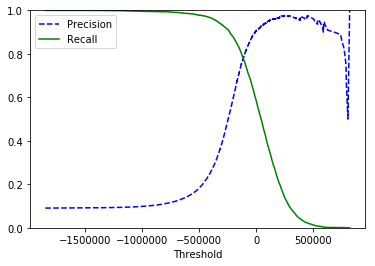

Wall time: 84.8 ms


In [43]:
%%time
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [44]:
%%time
y_train_pred_90 = (y_scores > 70000)
precision_score(y_train_5, y_train_pred_90)

Wall time: 5.98 ms


In [45]:
%%time
recall_score(y_train_5, y_train_pred_90)

Wall time: 7.98 ms


0.44585869765725883

In [46]:
#receiver operating characteristic(ROC) curve
#true positive rate against false positive rate

In [47]:
%%time
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Wall time: 6.98 ms


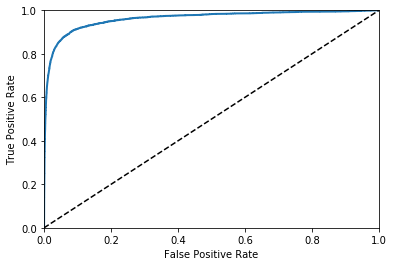

Wall time: 59.8 ms


In [48]:
%%time
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

plot_roc_curve(fpr, tpr)
plt.show()

In [49]:
%%time
#to compare classifiers measure the area under the curve(AUC)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

Wall time: 9 ms


In [50]:
%%time
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42, n_jobs=-1, verbose=1)

Wall time: 87.8 ms


In [51]:
%%time
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba", n_jobs=-1, verbose=1)

Wall time: 2.15 s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.9s finished


In [52]:
%%time
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

Wall time: 4.99 ms


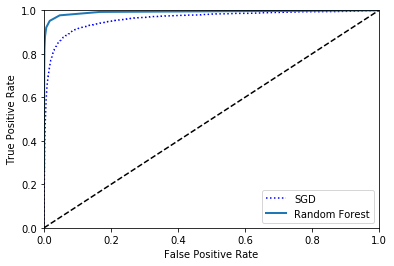

Wall time: 70.8 ms


In [53]:
%%time
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [54]:
%%time
roc_auc_score(y_train_5, y_scores_forest)

Wall time: 4.99 ms


0.99252020021214593

In [55]:
%%time
precision_score(y_train_5, y_train_pred)

Wall time: 5.98 ms


0.90631248214795768

In [56]:
%%time
recall_score(y_train_5, y_train_pred)

Wall time: 5.98 ms


0.58531636229477957

In [57]:
%%time
#multiclass classification
sgd_clf.fit(X_train, y_train)#y_train, not y_train_5
sgd_clf.predict([some_digit])

-- Epoch 1-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1

-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1
Norm: 6538.31, NNZs: 636, Bias: -187.415289, T: 60000, Avg. loss: 69871.667995Norm: 6067.11, NNZs: 599, Bias: -168.189339, T: 60000, Avg. loss: 47323.177794
Total training time: 0.07 seconds.

Total training time: 0.07 seconds.
-- Epoch 2
Norm: 6693.46, NNZs: 615, Bias: -134.988569, T: 60000, Avg. loss: 39001.053951-- Epoch 2
Norm: 4995.79, NNZs: 580, Bias: -30.441192, T: 60000, Avg. loss: 21376.056670
Total training time: 0.07 seconds.

Total training time: 0.07 seconds.
-- Epoch 2
-- Epoch 2
Norm: 6976.70, NNZs: 638, Bias: -116.396089, T: 60000, Avg. loss: 54074.111258
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 7917.97, NNZs: 618, Bias: 7.903960, T: 60000, Avg. loss: 99475.380189
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 5713.87, NNZs: 608, Bias: -64.922686, T: 60000, Avg. loss: 39531.984205Norm: 7783.22, NNZs: 633, Bias: -597.648763, T: 60000, Avg. loss: 1

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished


In [58]:
%%time
sgd_clf.predict([X[42000]])

Wall time: 0 ns


array([ 7.])

In [59]:
%%time
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

Wall time: 0 ns


In [60]:
%%time
sgd_clf.predict([some_digit])

Wall time: 0 ns


array([ 5.])

In [61]:
%%time
np.argmax(some_digit_scores)

Wall time: 0 ns


5

In [62]:
%%time
sgd_clf.classes_

Wall time: 0 ns


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [63]:
%%time
#using ONeVsOneClassifier or OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42, max_iter=5, tol=None, n_jobs=-1), n_jobs=10)
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

Wall time: 5.03 s


In [64]:
%%time
len(ovo_clf.estimators_)

Wall time: 0 ns


45

In [65]:
%%time
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

Wall time: 823 ms


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished


In [66]:
%%time
forest_clf.predict_proba([some_digit])

[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished


Wall time: 103 ms


array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0.6,  0.2,  0. ,  0.1,  0.1]])

In [67]:
%%time
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy", n_jobs=10, verbose=1)

Wall time: 2.26 s


[Parallel(n_jobs=10)]: Done   3 out of   3 | elapsed:    2.0s finished


array([ 0.86222755,  0.85899295,  0.87363104])

In [68]:
%%time
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy", n_jobs=10, verbose=1)

Wall time: 4.65 s


[Parallel(n_jobs=10)]: Done   3 out of   3 | elapsed:    3.1s finished


In [69]:
%%time
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3, n_jobs=-1, verbose=1)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

Wall time: 3.69 s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.3s finished


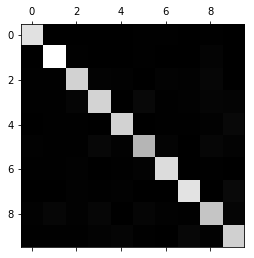

Wall time: 45.9 ms


In [70]:
%%time
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [71]:
%%time
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

Wall time: 997 µs


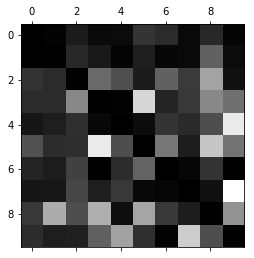

Wall time: 52.9 ms


In [72]:
%%time
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [73]:
%%time
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

Wall time: 5 ms


In [74]:
%%time
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = plt.cm.binary,
               interpolation="nearest")
    plt.axis("off")

Wall time: 0 ns


In [75]:
%%time
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = plt.cm.binary, **options)
    plt.axis("off")

Wall time: 0 ns


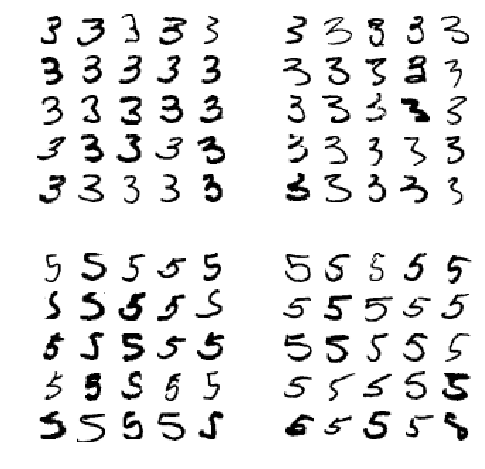

Wall time: 129 ms


In [76]:
%%time
plt.figure(figsize=(8, 8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [77]:
%%time
from sklearn.neighbors import KNeighborsClassifier

Wall time: 0 ns


In [78]:
%%time
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier(n_jobs=8)
knn_clf.fit(X_train, y_multilabel)

Wall time: 11.8 s


In [79]:
%%time
knn_clf.predict([some_digit])

Wall time: 104 ms


array([[False,  True]], dtype=bool)

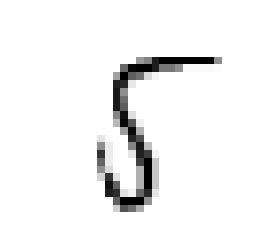

Wall time: 34.9 ms


In [80]:
%%time
plt.imshow(some_digit.reshape(28, 28), cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [81]:
%%time
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=6, verbose=1)

Wall time: 7min 13s


[Parallel(n_jobs=6)]: Done   3 out of   3 | elapsed:  7.2min finished


In [82]:
%%time
f1_score(y_multilabel, y_train_knn_pred, average="macro")

Wall time: 16 ms


0.97671901173807474

In [83]:
%%time
import numpy.random as rnd

train_noise = rnd.randint(0, 100, (len(X_train), 784))
test_noise = rnd.randint(0, 100, (len(X_test), 784))
X_train_mod = X_train + train_noise
X_test_mod = X_test + test_noise
y_train_mod = X_train
y_test_mod = X_test

Wall time: 464 ms


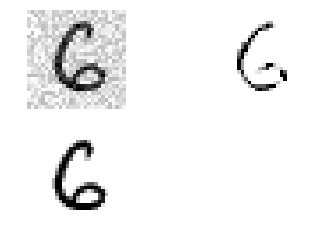

In [84]:
some_index = 7700
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_train_mod[some_index]])
plt.subplot(221); plot_digit(X_train_mod[some_index]);
plt.subplot(222); plot_digit(clean_digit);
plt.subplot(223); plot_digit(X_train[some_index]);

In [85]:
%%time
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

(70000, 784)
(70000,)
Wall time: 58.8 ms


In [86]:
from sklearn.model_selection import GridSearchCV

In [ ]:
knn_clf = KNeighborsClassifier(n_jobs=-1)

param_grid = [
    {'n_neighbors':[4, 5], 'weights':['uniform', 'distance']},
]

grid_search = GridSearchCV(knn_clf, param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=-1, verbose=100)
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
Memmaping (shape=(60000, 784), dtype=uint8) to new file C:\Users\ML\AppData\Local\Temp\joblib_memmaping_pool_23292_2151912563432\23292-2152052827472-be5fb1c6d98fd9d2d627ec76dc3e29e3.pkl
Pickling array (shape=(60000,), dtype=float64).
Pickling array (shape=(29997,), dtype=int32).
Pickling array (shape=(30003,), dtype=int32).
Memmaping (shape=(60000, 784), dtype=uint8) to old file C:\Users\ML\AppData\Local\Temp\joblib_memmaping_pool_23292_2151912563432\23292-2152052827472-be5fb1c6d98fd9d2d627ec76dc3e29e3.pkl
Pickling array (shape=(60000,), dtype=float64).
Pickling array (shape=(30003,), dtype=int32).
Pickling array (shape=(29997,), dtype=int32).
Memmaping (shape=(60000, 784), dtype=uint8) to old file C:\Users\ML\AppData\Local\Temp\joblib_memmaping_pool_23292_2151912563432\23292-2152052827472-be5fb1c6d98fd9d2d627ec76dc3e29e3.pkl
Pickling array (shape=(60000,), dtype=float64).
Pickling array (shape=(29997,), dtype=int32).
Pickling 

In [ ]:
grid_search.best_estimator_

In [ ]:
knn_clf = grid_search.best_estimator_
knn_clf.fit(X_train, y_train)
housing_predictions = knn_clf.predict(X_train)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [ ]:
knn_scores = cross_val_score(knn_clf, X_train, y_train, scoring="neg_mean_squared_error", cv=5, n_jobs=-1)
knn_rmse_scores = np.sqrt(-knn_scores)
display_scores(knn_rmse_scores)